1) кластеризовать изображение

In [294]:
import seaborn as sns
from scipy import ndimage, misc
from numpy.random import choice
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from matplotlib.colors import ListedColormap

In [295]:
def create_data(im):
    im_loaded = im.load()
    return [(x, y, im_loaded[x, y][0], im_loaded[x, y][1], im_loaded[x, y][2]) for x in range(im.size[0]) for y in range(im.size[1])]

In [302]:
def find_box_cluster(db):
    number = -1
    for center in db.cluster_centers_:
        number += 1
        if center[2] > 230 and center[2] < 250:
            if center[3] > 210 and center[3] < 230:
                if center[4] > 180 and center[4] < 200:
                    return number

In [297]:
def mean(db, c):
    return (db.cluster_centers_[c, 2] + db.cluster_centers_[c, 3] + db.cluster_centers_[c, 4]) / 3
    

In [298]:
original = Image.open("Darkorbit.PNG")
image = original.copy()

In [299]:
%%time
image_loaded = image.load()
db = KMeans(n_clusters = 10)
data = create_data(image)
db_clusters = db.fit_predict(data)

Wall time: 1.56 s


In [312]:
center_number = find_box_cluster(db)
for p, c in zip(data, db_clusters):
    if center_number != c
        image_loaded[p[0], p[1]] = (int(mean(db, c)),
                                    int(mean(db, c)),
                                    int(mean(db, c)))
    else:
        image_loaded[p[0], p[1]] = (int(db.cluster_centers_[c, 2]),
                                    int(db.cluster_centers_[c, 3]),
                                    int(db.cluster_centers_[c, 4]))

32458 685


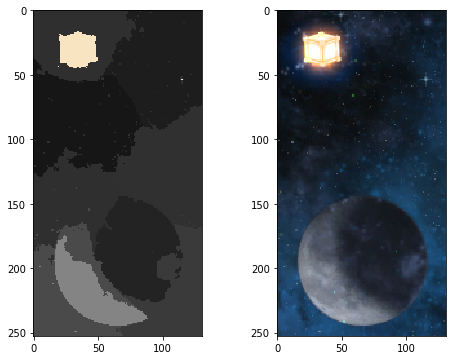

In [313]:
_, axes = plt.subplots(1, 2)
plt.rcParams['figure.figsize'] = (8, 6)

axes[0].imshow(image)
axes[1].imshow(original)

2) удобно задать объект для поиска

3) заданный объект нужно оставить цветным, остальное изображение сделать оттенками серого

4) Кластеризовать новое изображение, обнаружить на нём заданный объект

5) оформить всё в виде работоспособной программы